# Looking at Data
(Jason)

In [6]:
def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces = measure.marching_cubes_classic(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [7]:
%matplotlib inline
import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
% matplotlib inline
# Some constants 
INPUT_FOLDER = '/a/data/lungdl/3D_pruned/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()

In [13]:
ls -l .

total 6836
-rw-------. 1 atong01 games   22082 May  5 13:51 data_exploration.ipynb
-rw-------. 1 atong01 games    8726 Apr 24 15:33 full_preprocess.py
-rw-------. 1 atong01 games      43 Apr 24 15:33 jupyter.sh
-rw-------. 1 atong01 games   21020 Apr 24 15:33 parallel_preprocess.ipynb
-rw-------. 1 atong01 games 4719709 Apr 26 10:05 preprocess.ipynb
-rw-------. 1 atong01 games    8418 Apr 24 15:33 preprocess.py
-rw-------. 1 atong01 games 2195375 Apr 24 15:33 sample_kernal.ipynb
-rw-------. 1 atong01 games     136 Apr 24 15:33 start.sh


In [9]:
lung_files = [os.path.splitext(f)[0] for f in os.listdir(INPUT_FOLDER)]
print lung_files[:10]

def lung_to_path(lung_id):
    return INPUT_FOLDER + lung_id + ".npy"
def load_lung(lung_id):
    return np.load(lung_to_path(lung_id))
def get_random_lung():
    random_lung_id = np.random.choice(lung_files, 1)[0]
    return load_lung(random_lung_id)

['b635cda3e75b4b7238c18c6a5f1858f6', '178663e1e238cdfa4d4eb9679e5d0aa4', '75aef267ad112a21c870b7e2893aaf8a', 'ac68eb0a3db3de247c26909db4c10569', '2a549c66f24af964de6f25165c55e331', 'b61b1911d3631bee521fcda3a3e568a1', '565cdee745ea4e6afc0f7daae81a7963', 'dbfbc12c7a943a2dc0e34bfd4a636bca', '85059119462b510aacb6da54983addcf', '440fb90654b1436e7c3bbdac991b8c1d']


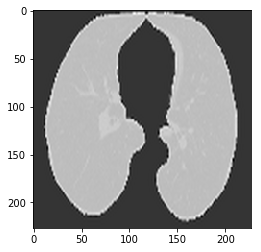

(60, 227, 227)


In [11]:
random_lung = get_random_lung()
random_lung = load_lung(lung_files[0])
plt.imshow(random_lung[30,:,:], cmap=plt.cm.gray)
plt.show()
print (random_lung.shape)

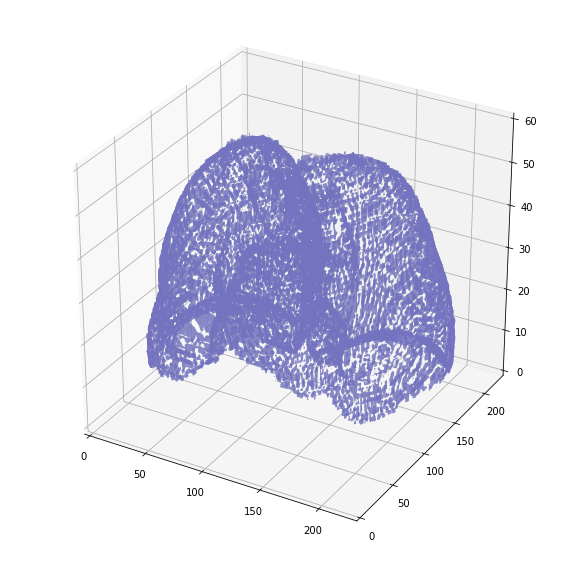

In [12]:
plot_3d(random_lung, 400)